In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import random
import scipy.io
from scipy import signal

In [107]:
mat = scipy.io.loadmat('KMbic1.mat')
cw = dict()
for i in range(0,4):
    cw[i] = mat['data'][0][int(mat['datastart'][i]-1):int(mat['dataend'][i])-1]
Cw1 = cw[0]
Cw1 = Cw1+np.sin(np.linspace(0,4,len(Cw1)))/1000
Cw1[-15000:] = np.sin(np.linspace(0,10000,15000))/1000

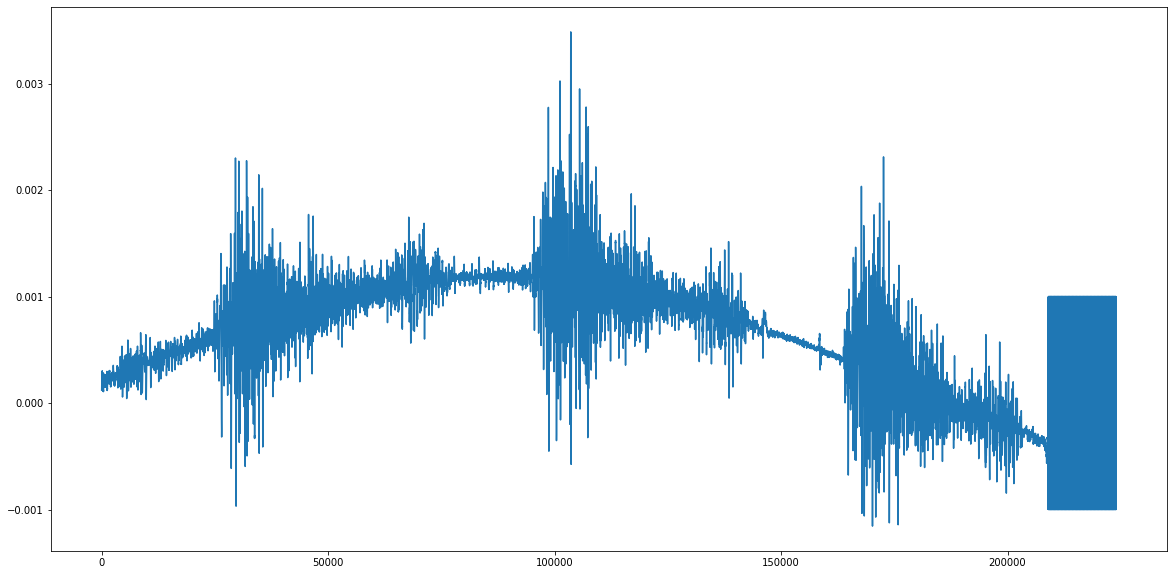

In [108]:
plt.figure(figsize=[20,10])
plt.plot(Cw1)
plt.show()

W pierwszym roku chcemy usunąć zniekształcenia z naszego sygnału. Można w tym celu wykorzystać filtrację cyfrową np. filtr Butterwortha:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html

Dobrze przy tym jest znać częstotliwość próbkowania naszego sygnału. W tym przypadku jest to 10000 Hz.

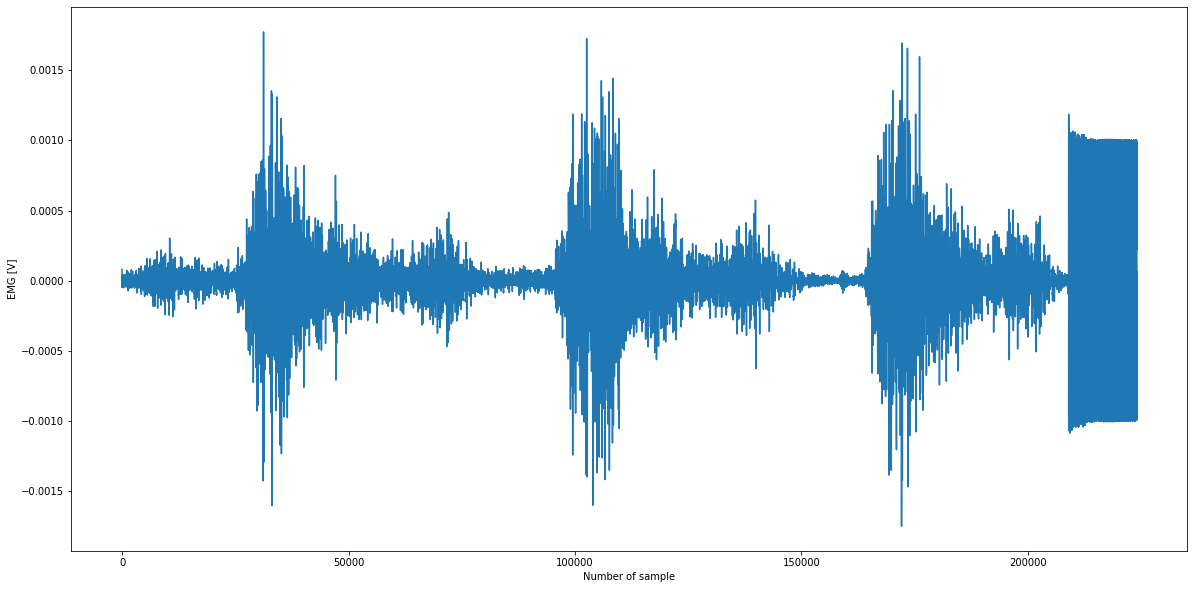

In [124]:
sos2 = signal.butter(100, 20, 'hp', output = 'sos', fs = 10000) # high-pass filtering on 20 Hz

emgf1 = signal.sosfilt(sos2, Cw1)

fig = plt.figure(figsize=[20,10])
plt.plot(emgf1)

plt.xlabel('Number of sample')
plt.ylabel('EMG [V]')
plt.show()

# Zadanie 
usuń szum z końca sygnału, przy pomocy filtru dolnoprzepustowego ustaw częstotliwość graniczną na 200

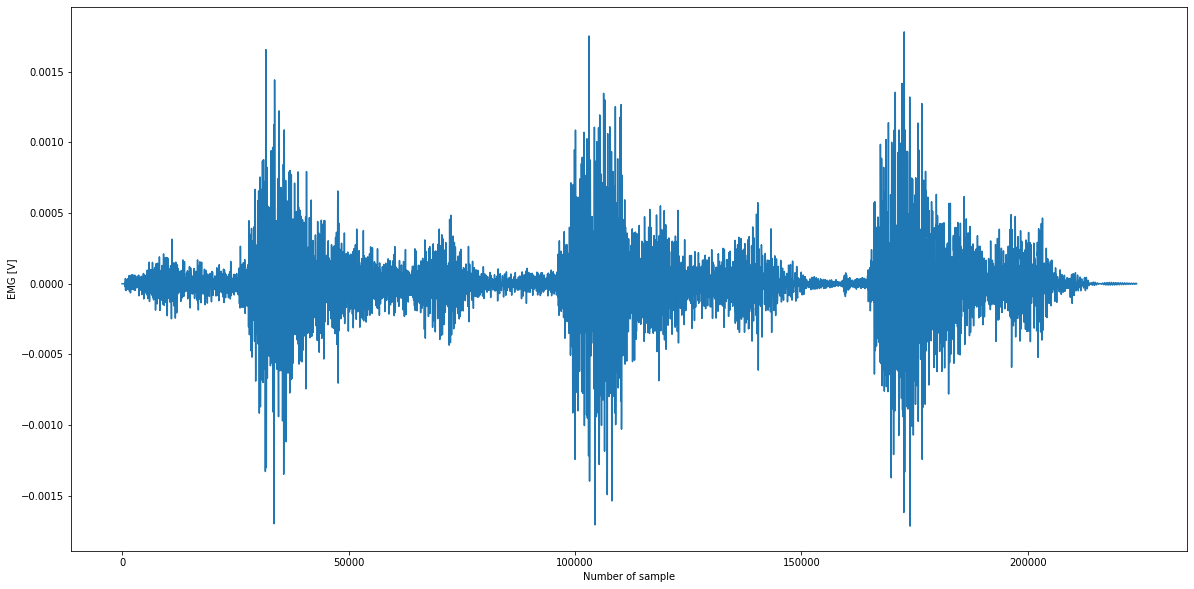

In [125]:
sos1 = signal.butter(100, 200, 'lp', output = 'sos', fs = 10000) # low-pass filtering on 200 Hz

emgf1 = signal.sosfilt(sos1, emgf1)

fig = plt.figure(figsize=[20,10])
plt.plot(emgf1)

plt.xlabel('Number of sample')
plt.ylabel('EMG [V]')
plt.show()

# Zadanie 2
Policz RMS (root mean sqaure) dla sygnału przy oknie 1000.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.rolling.html

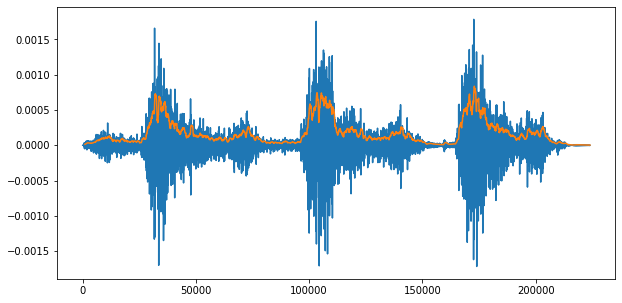

In [126]:
window = 1000
#emgf1 = emgf1[::20]

emg = pd.Series(emgf1)
emg1 = emg**2
rms = np.sqrt(emg1.rolling(window).mean())
plt.figure(figsize=[10,5])
plt.plot(emg)
plt.plot(rms)
plt.show()
